In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/경기과대/빅데이터 서포터즈/6월 발표/WHR2023.csv')
df.head(5)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [ ]:
# 데이터 셋 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [ ]:
# 필요한 열만 추출
df = df[['Country name','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia']]
df.head(5)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778


In [ ]:
# 행복 지수로 정렬
df = df.sort_values('Ladder score',ascending=False)
df.head(3)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182,1.778
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196,1.778
2,Iceland,7.530,10.896,0.983,72.05,0.936,0.211,0.668,1.778


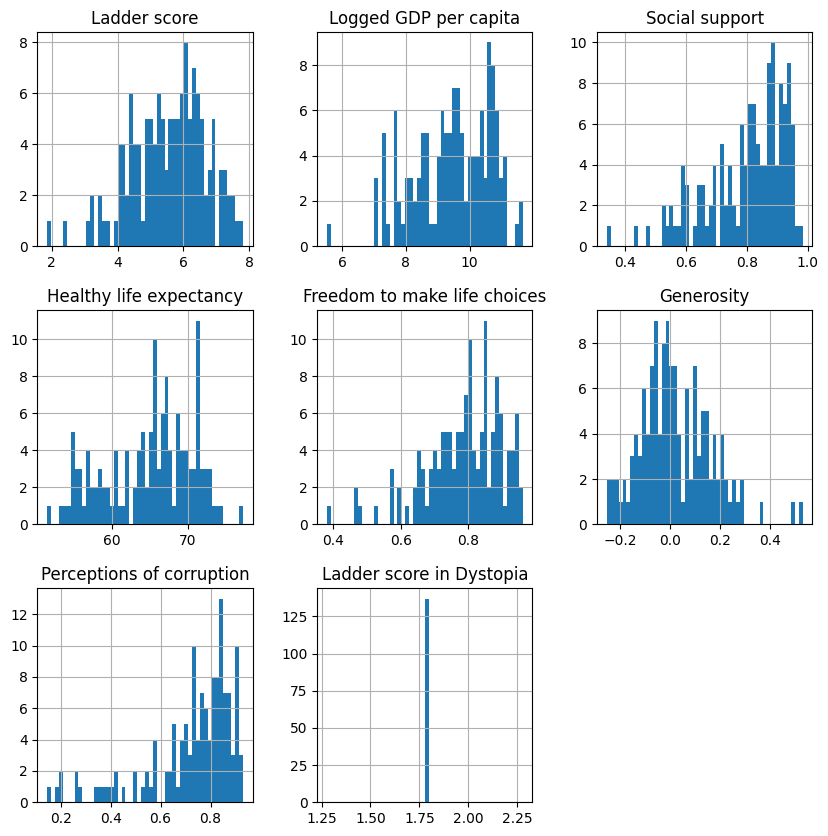

In [ ]:
# 이상치 확인
df.hist(bins=50,figsize=(10,10))
plt.show()

In [ ]:
# 이상치 열의 고유값 출력
df['Ladder score in Dystopia'].unique()

array([1.778])

In [ ]:
# 값이 하나만 있으므로 분석에 필요없다 판단해 제거
df = df.drop(['Ladder score in Dystopia'],axis=1)
df.head(3)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.05,0.936,0.211,0.668


In [ ]:
# Ladder score를 반올림하고 Rank로 열을 만듬
rank = list(df['Ladder score'].round(0))
df['Rank'] = rank
df.head(3)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Rank
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182,8.0
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196,8.0
2,Iceland,7.530,10.896,0.983,72.05,0.936,0.211,0.668,8.0




---

전체 국가에 대한 분석

<ipython-input-214-dc451cba8906>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-214-dc451cba8906>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(),annot=True, fmt = '.2f',cmap='Blues',mask = mask)


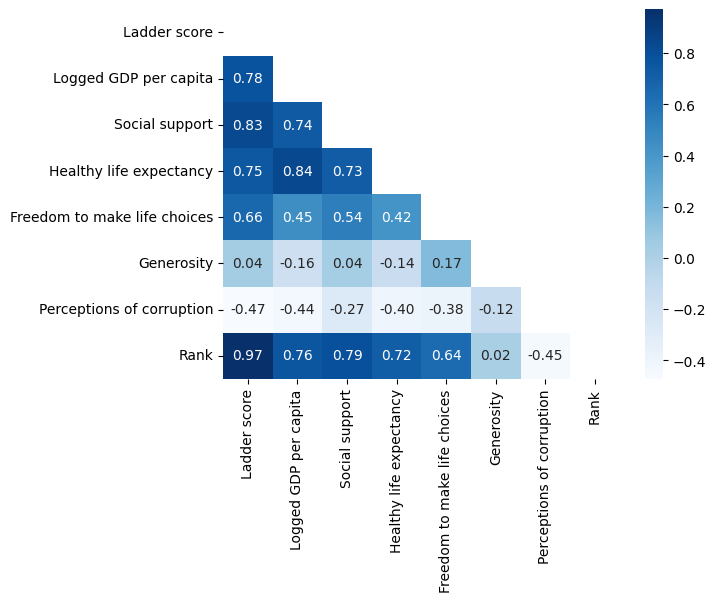

In [ ]:
# 상관관계 확인
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(data = df.corr(),annot=True, fmt = '.2f',cmap='Blues',mask = mask)
plt.show()

In [ ]:
# 각 랭크 별 평균 값
df.pivot_table  (index = ['Rank'],
                 aggfunc = 'mean')

<ipython-input-243-5b53c1b30502>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table  (index = ['Rank'],


,Freedom to make life choices,Generosity,Healthy life expectancy,Ladder score,Logged GDP per capita,Perceptions of corruption,Social support
Rank,,,,,,,
2.0,0.428000,-0.111000,60.430500,2.125500,8.401000,0.869000,0.435500
3.0,0.694000,-0.013000,55.505000,3.295800,7.794600,0.807400,0.636200
4.0,0.721476,0.084429,60.026476,4.189952,8.204333,0.761429,0.664667
5.0,0.731242,0.013636,61.496031,5.024424,8.800758,0.778697,0.735121
6.0,0.828082,-0.009673,67.383041,6.020714,9.850531,0.784469,0.866612
7.0,0.869083,0.053542,70.523500,6.937167,10.866875,0.518042,0.909750
8.0,0.943667,0.108667,71.483333,7.640000,10.883333,0.348667,0.968667


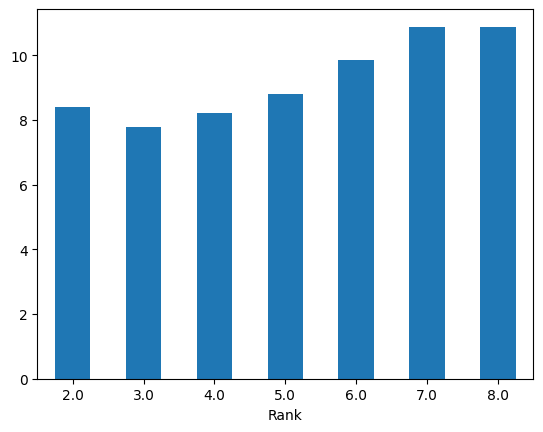

In [ ]:
# 랭크 별 평균 GDP
df_GDP = df.groupby(['Rank'])['Logged GDP per capita'].mean()
df_GDP.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

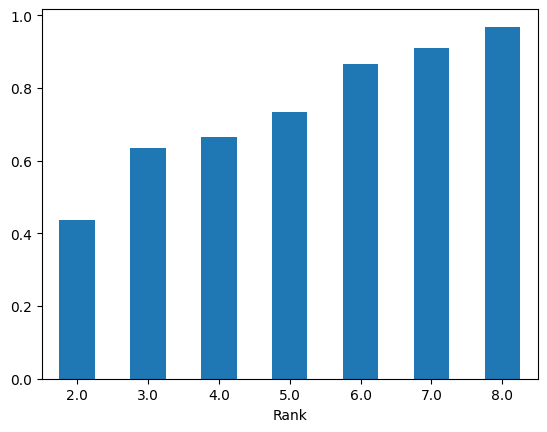

In [ ]:
# 랭크 별 평균 사회적 지원
df_support = df.groupby(['Rank'])['Social support'].mean()
df_support.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

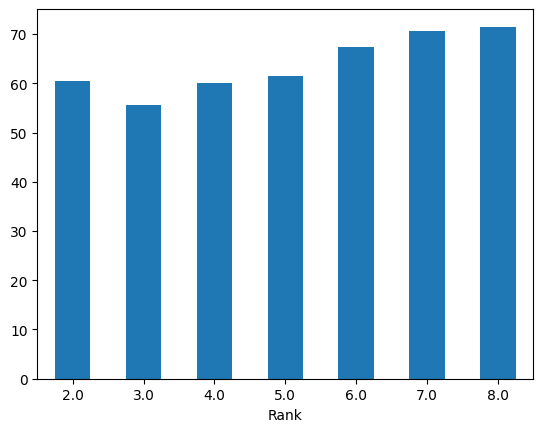

In [ ]:
# 랭크 별 평균 수명
df_health = df.groupby(['Rank'])['Healthy life expectancy'].mean()
df_health.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

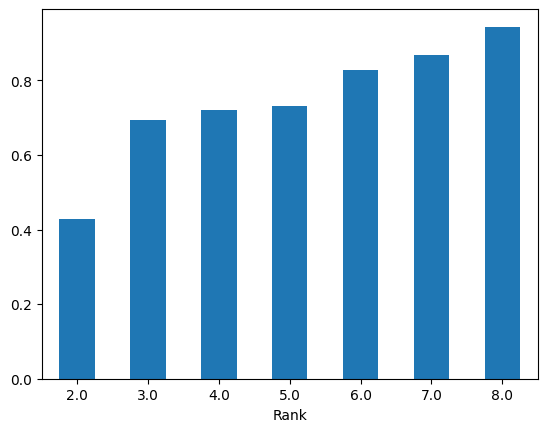

In [ ]:
# 랭크 별 평균 자유로운 삶의 선택
df_free = df.groupby(['Rank'])['Freedom to make life choices'].mean()
df_free.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

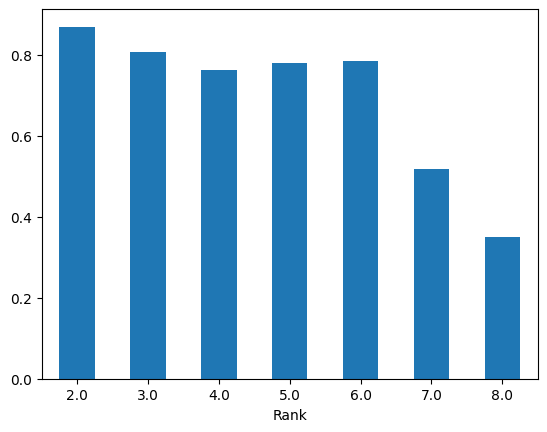

In [ ]:
# 랭크 별 평균 부정부패에 대한 인식
df_cor = df.groupby(['Rank'])['Perceptions of corruption'].mean()
df_cor.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()



---

각 랭크 별 최상위 국가 비교 분석

In [ ]:
# 각 랭크 별로 Ladder score가 가장 높은 국가 8개 변수에 저장
df_rank = pd.DataFrame({
    'Country name':[],'Ladder score':[],'Logged GDP per capita':[],'Social support':[],'Healthy life expectancy':[],'Freedom to make life choices':[],'Generosity':[],'Perceptions of corruption':[],'Rank':[]
})
for i in range(1,9):
    max_score = df[df['Rank']==i]['Ladder score'].max()
    df_con = df.loc[(df['Ladder score'] == max_score) & (df['Rank']==i)]
    df_rank = pd.concat([df_rank,df_con],ignore_index = True)
df_rank

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Rank
0,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,2.0
1,Malawi,3.495,7.302,0.531,58.475,0.750,0.005,0.749,3.0
2,Tunisia,4.497,9.244,0.730,67.000,0.576,-0.213,0.907,4.0
3,Bulgaria,5.466,10.087,0.918,66.500,0.801,-0.057,0.911,5.0
4,Uruguay,6.494,10.037,0.913,67.500,0.895,-0.065,0.575,6.0
5,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,7.0
6,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,8.0


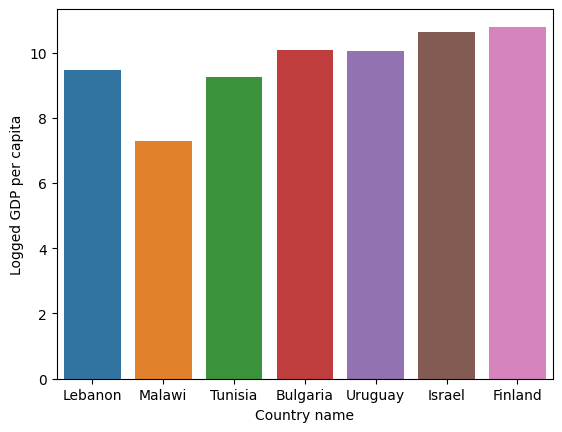

In [ ]:
# 1인당 국내 총 생산 ( 편차가 크지 않음, 영향 별로 없음, 심지어 랭크가 더 높은 말라위는 레바논보다 GDP가 낮음)
sns.barplot(data = df_rank, x = 'Country name',y = 'Logged GDP per capita')
plt.show()

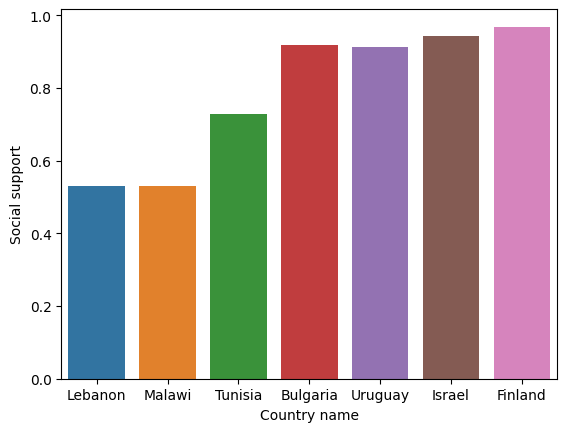

In [ ]:
# 사회적 지원 ( 랭크가 높을 수록 사회적 지원률이 높게 나옴, 즉 크게 영향 끼침 )
sns.barplot(data = df_rank, x = 'Country name',y = 'Social support')
plt.show()

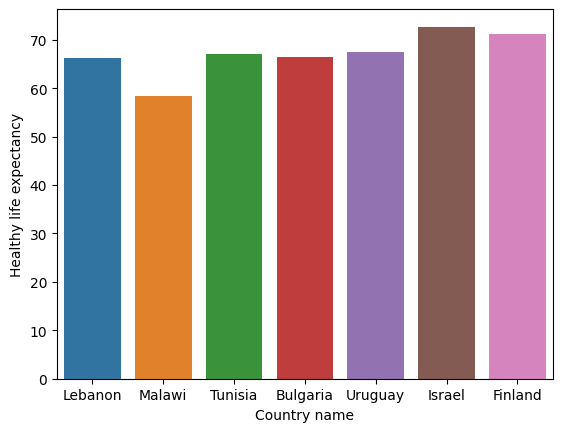

In [ ]:
# 평균 수명 (평균 수명에 따른 랭크 차이가 거의 없음 즉, 영향이 크지 않다 볼 수 있음)
sns.barplot(data = df_rank, x = 'Country name',y = 'Healthy life expectancy')
plt.show()

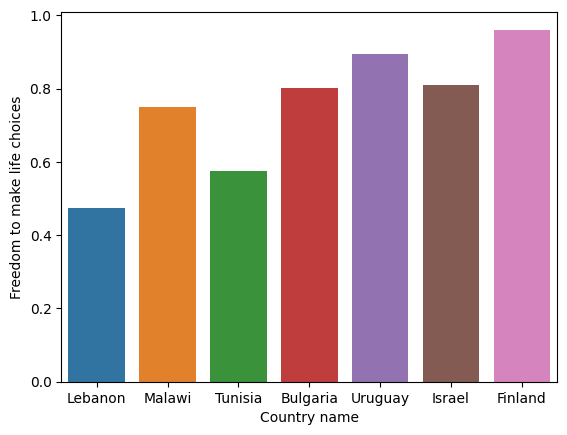

In [ ]:
# 살고 싶은 삶을 살 수 있는지 ( 랭크가 낮을 수록 낮은 경향을 보임)
sns.barplot(data = df_rank, x = 'Country name',y = 'Freedom to make life choices')
plt.show()

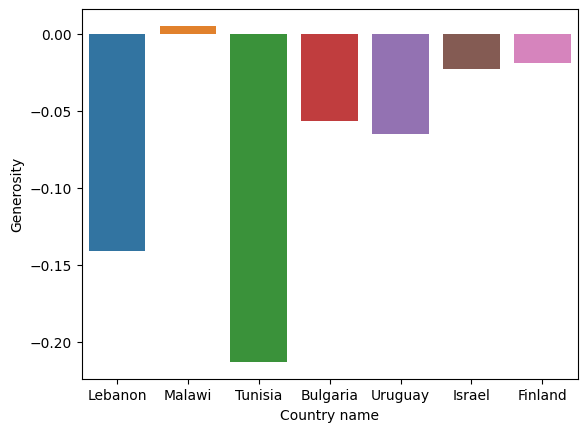

In [ ]:
# 관용 정신 ( 랭크가 낮을 수록 낮은 경향을 보임) 관용 정신이란 다른 민족이나 종교, 문화를 포용할 수 있는 능력
sns.barplot(data = df_rank, x = 'Country name',y = 'Generosity')
plt.show()

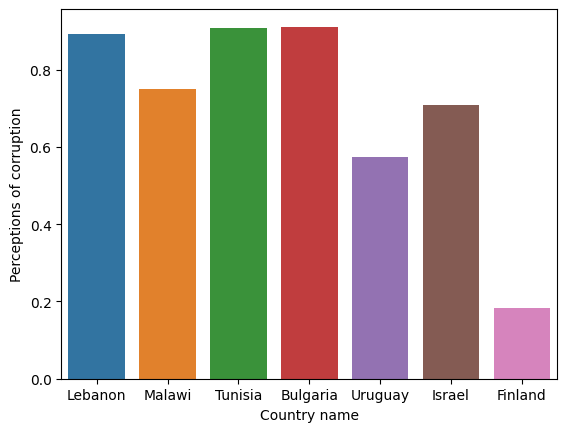

In [ ]:
# 부정부패에 대한 인식 ( 낮은 랭크 일 수록 부정부패가 심함 )
sns.barplot(data = df_rank, x = 'Country name',y = 'Perceptions of corruption')
plt.show()



---

한국과 상위 나라 5개 비교

In [ ]:
# 한국의 행복 지수
df_korea = df[df['Country name'].str.contains('Korea')].copy()
df_korea

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Rank
56,South Korea,5.951,10.693,0.812,73.65,0.717,-0.046,0.701,6.0


In [ ]:
# 행복 지수 상위 국가 5개 뽑음
df_high = df.head(5).copy()
df_high

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,8.0
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,8.0
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,8.0
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,7.0
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,7.0


In [ ]:
# 한국과 행복 지수 상위 국가 5개를 비교하기 위해 데이터 프레임 합침
df_ko = pd.concat([df_high,df_korea],ignore_index = True)
df_ko = df_ko.sort_values('Ladder score')

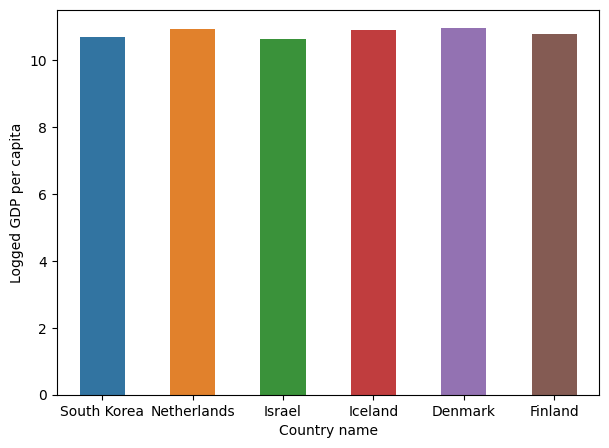

In [ ]:
# 1인당 국내 총 생산 ( 행복지수 랭크는 왼쪽에서 오른쪽으로 커짐 )
plt.figure(figsize=(7,5))
sns.barplot(data = df_ko, x = 'Country name',y = 'Logged GDP per capita',width=0.5)
plt.show()

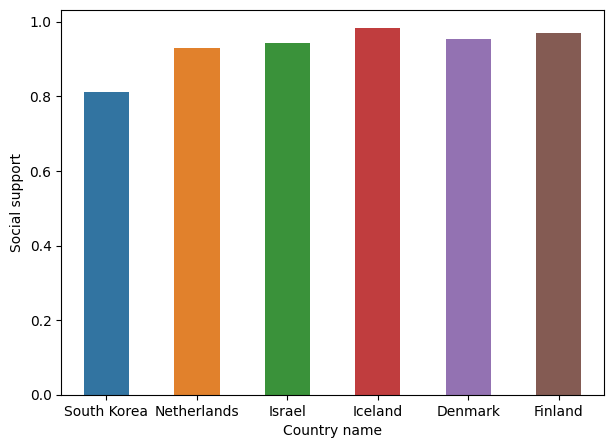

In [ ]:
# 사회적 지원 ( 행복지수 랭크는 왼쪽에서 오른쪽으로 커짐 )
plt.figure(figsize=(7,5))
sns.barplot(data = df_ko, x = 'Country name',y = 'Social support',width=0.5)
plt.show()

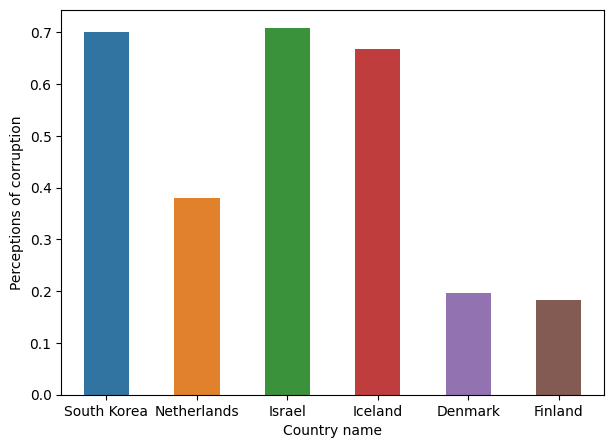

In [ ]:
# 부정부패
plt.figure(figsize=(7,5))
sns.barplot(data = df_ko, x = 'Country name',y = 'Perceptions of corruption',width=0.5)
plt.show()

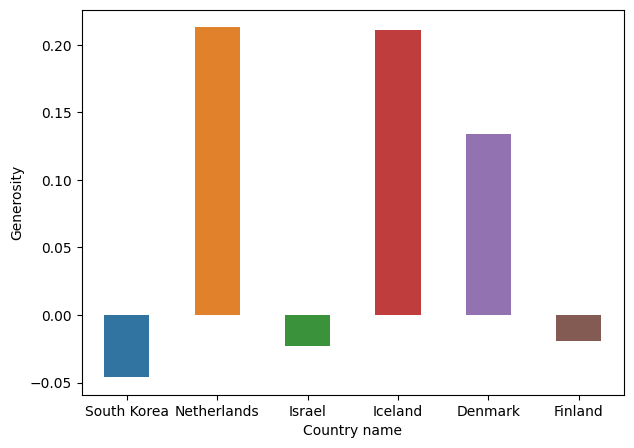

In [ ]:
# 관용 정신 우리나란 다른 민족이나 종교, 문화를 포용할 수 있는 능력이 떨어짐
plt.figure(figsize=(7,5))
sns.barplot(data = df_ko, x = 'Country name',y = 'Generosity',width=0.5)
plt.show()

In [ ]:
country = pd.read_csv('/content/drive/MyDrive/경기과대/빅데이터 서포터즈/6월 발표/world_country_and_usa_states_latitude_and_longitude_values.csv')
country = country[['country','latitude','longitude']]
country

,country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615
...,...,...,...
240,Yemen,15.552727,48.516388
241,Mayotte,-12.827500,45.166244
242,South Africa,-30.559482,22.937506
243,Zambia,-13.133897,27.849332


In [ ]:
hap_high = list(df['Country name'].head(15))
hap_high

In [ ]:
hap_low = list(df['Country name'].tail(16))
hap_low

In [ ]:
import folium

def maker(lat,lng):
    mak = folium.Marker([lat,lng],
                        icon = folium.Icon(color='blue'))
    mak.add_to(m)

m = folium.Map()

# 행복 지수 상위 15개 나라 -> 유럽

for i in hap_high:
    lat = country[country['country']==i]['latitude'].values
    lng = country[country['country']==i]['longitude'].values
    maker(lat,lng)

# 행복 지수 하위 15개 나라 -> 아프리카
next = 1
for i in hap_low:
    if next == 12:
        next = 0
        continue
    lat = country[country['country']==i]['latitude'].values
    lng = country[country['country']==i]['longitude'].values
    next+=1
    mak = folium.Marker([lat,lng],
                        icon = folium.Icon(color='red'))
    mak.add_to(m)

m